In [1]:
from os.path import join
fname = 'ecg20230519-154359.h5'
fpath = join('logs', fname)

In [2]:
import h5py
f = h5py.File(fpath, 'r')

In [3]:
f.keys()

<KeysViewHDF5 ['ecg_filt', 'ecg_raw', 'stim_size', 't_since_qrs']>

In [4]:
import numpy as np
timestamps = [sample[0] for sample in f['ecg_raw']]
timestamps = np.array(timestamps)

In [5]:
1/np.diff(timestamps).mean() # average sampling rate

99.99776283888723

In [6]:
x = np.stack([sample[1] for sample in f['ecg_raw']])
ecg = x[:, 0]

In [7]:
t_filt = np.array([sample[0] for sample in f['ecg_filt']])
ecg_filt = np.array([sample[1] for sample in f['ecg_filt']])

In [8]:
t_qrs = np.array([sample[0] for sample in f['t_since_qrs']])
qrs = np.array([sample[1] for sample in f['t_since_qrs']])

In [9]:
t_sz = np.array([sample[0] for sample in f['stim_size']])
red = np.array([sample[1] for sample in f['stim_size']])
blue = np.array([sample[2] for sample in f['stim_size']])

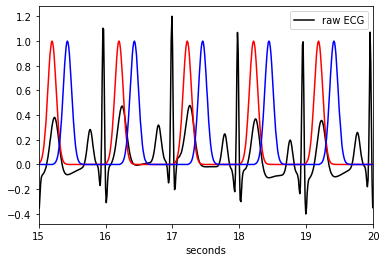

In [11]:
from matplotlib import pyplot as plt
plt.plot(timestamps - timestamps[0], ecg, label = 'raw ECG', color = 'black')
plt.plot(t_sz - timestamps[0], red, color = 'red')
plt.plot(t_sz - timestamps[0], blue, color = 'blue')
#plt.plot(t_filt - timestamps[0], ecg_filt, label = 'filtered')
#plt.plot(t_qrs - timestamps[0], qrs, label = 'time since R-peak')
plt.xlim(15, 20)
plt.xlabel('seconds')
plt.legend()
plt.show()